In [15]:
from prosit_t.inference.inference_time import get_model_times, plot_inference_time_comparison
import tensorflow as tf
import os
import wandb
from prosit_t.wandb_agent.train_utils import get_proteometools_data
from prosit_t.models import PrositTransformerV2, ProstTransformerDynamicLenDropLast
from prosit_t.eval import prosit_transformer_eval
from dlomix.models import PrositIntensityPredictor
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
data_config = {
    "data_source": {
        "train": "/cmnfs/proj/prosit/Transformer/first_pool_train.parquet",
        "val": "/cmnfs/proj/prosit/Transformer/first_pool_test.parquet",
    },
    "fragmentation": "HCD",
    "batch_size": 1024,
    "seq_length": 30,
}

In [4]:
project_name = "transforming-prosit-first-pool"
run = wandb.init(project=project_name)

wandb: Currently logged in as: mamisashvili-lizi (prosit-compms). Use `wandb login --relogin` to force relogin


In [5]:
_, val_data = get_proteometools_data(data_config)

2023-11-22 19:30:48.500692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 19:30:48.644739: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43607 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:21:00.0, compute capability: 8.6


In [6]:
test_batch = val_data.take(1)

In [7]:
artifact_path = "prosit-compms/transforming-prosit-first-pool/model-hardy-pine-74:v144"
transformer = PrositTransformerV2(
    seq_length=30,
    embedding_output_dim=64,
    num_heads=16,
    num_transformers=6,
    dense_dim_factor=4
)
transformer = prosit_transformer_eval.load_model(run,artifact_path,transformer)

wandb:   5 of 5 files downloaded.  
2023-11-22 19:31:06.398042: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ./artifacts/model-hardy-pine-74:v144: FAILED_PRECONDITION: artifacts/model-hardy-pine-74:v144; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [8]:
baseline_path = "prosit-compms/transforming-prosit-first-pool/model-classic-star-15:v45"
baseline = PrositIntensityPredictor(
    seq_length=30,
    embedding_output_dim=16,
    recurrent_layers_sizes=(256, 512)
)
baseline = prosit_transformer_eval.load_model(run,baseline_path,baseline)

wandb:   4 of 4 files downloaded.  
2023-11-22 19:31:07.484843: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ./artifacts/model-classic-star-15:v45: FAILED_PRECONDITION: artifacts/model-classic-star-15:v45; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [9]:
artifact_small_path = "prosit-compms/transforming-prosit-first-pool/model-swept-monkey-124:v80"
transformer_small = PrositTransformerV2(
    seq_length=30,
    embedding_output_dim=64,
    num_heads=8,
    num_transformers=6,
    dense_dim_factor=4
)
transformer_small = prosit_transformer_eval.load_model(run,artifact_small_path,transformer_small)

wandb:   5 of 5 files downloaded.  
2023-11-22 19:31:08.493498: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ./artifacts/model-swept-monkey-124:v80: FAILED_PRECONDITION: artifacts/model-swept-monkey-124:v80; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [10]:
df = get_model_times({
    "Transformer Prosit": transformer,
    "Prosit": baseline,
    "Transformer Prosit Small": transformer_small
}, test_batch)

2023-11-22 19:31:09.898961: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA A40" frequency: 1740 num_cores: 84 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 45725712384 bandwidth: 696096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
2023-11-22 19:31:10.033665: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 128ms/step


/cmnfs/home/l.mamisashvili/transforming-prosit/prosit_t/inference/inference_time.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"model": name, "time": inference_time}, ignore_index=True)


1/1 [==============================] - 0s 102ms/step


2023-11-22 19:31:54.469281: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8906


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 92ms/step


/cmnfs/home/l.mamisashvili/transforming-prosit/prosit_t/inference/inference_time.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"model": name, "time": inference_time}, ignore_index=True)


1/1 [==============================] - 1s 1s/step


2023-11-22 19:32:26.274818: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA A40" frequency: 1740 num_cores: 84 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 45725712384 bandwidth: 696096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 106ms/step


/cmnfs/home/l.mamisashvili/transforming-prosit/prosit_t/inference/inference_time.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"model": name, "time": inference_time}, ignore_index=True)


In [11]:
df["color"] = ["#2c77b4", "#f77f10", "#238523"]

/cmnfs/home/l.mamisashvili/transforming-prosit/prosit_t/inference/inference_time.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{int(x)}%" for x in ax.get_yticks()])


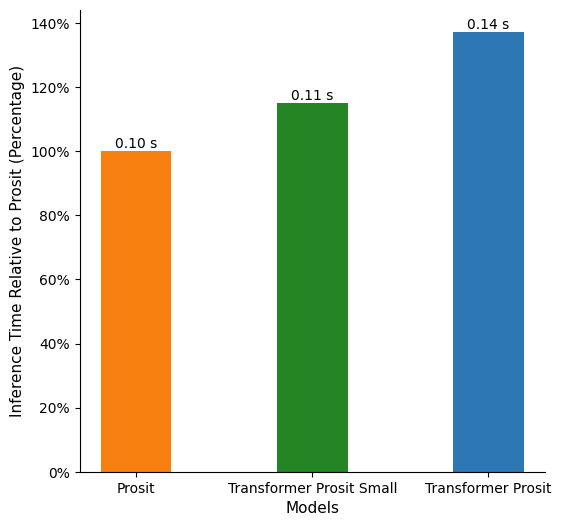

In [16]:
plot_inference_time_comparison(df, "Prosit")

In [22]:
_, val_data_dynamic = get_tfdatasets(batch_size=1024, encode_ox=False)

In [23]:
artifact_dynamic_path = "prosit-compms/transforming-prosit-first-pool/model-glorious-dawn-885:v94"
transformer_dynamic = ProstTransformerDynamicLenDropLast(
    embedding_output_dim=64,
    num_heads=16,
    meta_embedding_dim=256,
    num_transformers=6
)
transformer_dynamic = prosit_transformer_eval.load_model(run,artifact_dynamic_path,transformer_dynamic)

wandb:   5 of 5 files downloaded.  
2023-10-30 09:06:30.236779: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ./artifacts/model-glorious-dawn-885:v94: FAILED_PRECONDITION: artifacts/model-glorious-dawn-885:v94; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [24]:
tf.config.run_functions_eagerly(True)

In [25]:
dynamic_test_batch = val_data_dynamic.take(1)

In [26]:
transformer_dynamic_time = record_time(transformer_dynamic, dynamic_test_batch)

1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 106ms/step


In [27]:
df = df.append(
    {"model": "dynamic_input_transformer", "time": transformer_dynamic_time}, 
    ignore_index=True
)

/tmp/ipykernel_2800704/2027100843.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [28]:
fig = px.bar(df, x='model', y='time')
fig.show()